# Sistem Rekomendasi Produk Dari Amazon

## Persiapan Library

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta

In [2]:
# Plotting import
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator

import seaborn as sns
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

## Memproses Data

### Memasukkan Data

In [3]:
from pathlib import Path
comp_dir = Path('C:/Users/Atam Rifai S/OneDrive - ITPLN/OneDrive - Komputer/Script/Machine Learning/Dicoding/Rekomendasi sistem')

In [4]:
lectronics_data_pure=pd.read_csv(comp_dir / "Amazon_Electronics_by_Ratings.csv")
lectronics_data_pure.head(10)

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


### Memberi Nama Kolom

In [5]:
#Menambahkan dataset dari review electronics
electronics_data=pd.read_csv(comp_dir / "Amazon_Electronics_by_Ratings.csv", dtype={'rating': 'int8'},
                             names=['userId', 'productId','rating','timestamp'], index_col=None, header=0)
#Memperlihatkan head
electronics_data.head(10)

,userId,productId,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5,1341100800
1,A2NWSAGRHCP8N5,0439886341,1,1367193600
2,A2WNBOD3WNDNKT,0439886341,3,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1,1334707200
4,A1QGNMC6O1VW39,0511189877,5,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2,1397433600
6,A2TY0BTJOTENPG,0511189877,5,1395878400
7,A34ATBPOK6HCHY,0511189877,5,1395532800
8,A89DO69P0XZ27,0511189877,5,1395446400
9,AZYNQZ94U6VDB,0511189877,5,1401321600


### Melihat Info Data

In [6]:
electronics_data.describe()

,rating,timestamp
count,7.824481e+06,7.824481e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [7]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     object
 1   productId  object
 2   rating     int8  
 3   timestamp  int64 
dtypes: int64(1), int8(1), object(2)
memory usage: 186.6+ MB


In [8]:
printmd("**Jumlah dari Ratings**: {:,}".format(electronics_data.shape[0]) )
printmd("**Jenis Kolom Yang Tersedia**: {}".format( np.array2string(electronics_data.columns.values)) )
printmd("**Jumlah dari User**: {:,}".format(len(electronics_data.userId.unique()) ) )
printmd("**Jumlah dari produk**: {:,}".format(len(electronics_data.productId.unique())  ) )

**Jumlah dari Ratings**: 7,824,481

**Jenis Kolom Yang Tersedia**: ['userId' 'productId' 'rating' 'timestamp']

**Jumlah dari User**: 4,201,696

**Jumlah dari produk**: 476,001

### Mengecek Baris Kosong

In [9]:
printmd('**Jumlah dari baris kosong**:')
pd.DataFrame(electronics_data.isnull().sum().reset_index()).rename( columns={0:"Total Kosong","index":"Kolom"}) 

**Jumlah dari baris kosong**:

,Kolom,Total Kosong
0,userId,0
1,productId,0
2,rating,0
3,timestamp,0


## Persiapan Data

### Melihat data berdasarkan waktu dan ratingnya dijumlah

In [10]:
data_by_date = electronics_data.copy()
data_by_date.timestamp = pd.to_datetime(electronics_data.timestamp, unit="s")#.dt.date
data_by_date = data_by_date.sort_values(by="timestamp", ascending=False).reset_index(drop=True)
printmd("**Number of Ratings each day:**")
data_by_date.groupby("timestamp")["rating"].count().tail(10).reset_index()

**Number of Ratings each day:**

,timestamp,rating
0,2014-07-14,9701
1,2014-07-15,6892
2,2014-07-16,5943
3,2014-07-17,4781
4,2014-07-18,4912
5,2014-07-19,4183
6,2014-07-20,4273
7,2014-07-21,5458
8,2014-07-22,5010
9,2014-07-23,695


### Melihat Grafik Trends Berdasarkan Waktu dan Total Pemberian Rating

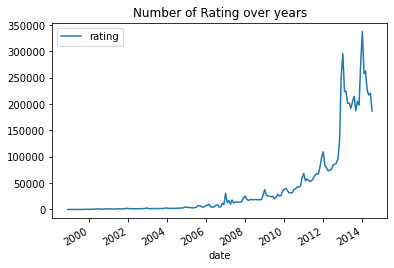

In [11]:
data_by_date["year"]  = data_by_date.timestamp.dt.year
data_by_date["month"] = data_by_date.timestamp.dt.month
rating_by_year = data_by_date.groupby(["year","month"])["rating"].count().reset_index()
rating_by_year["date"] = pd.to_datetime(rating_by_year["year"].astype("str")  +"-"+rating_by_year["month"].astype("str") +"-1")
rating_by_year.plot(x="date", y="rating")
plt.title("Number of Rating over years")
plt.show()

## Membuat Model

In [12]:
import numpy as np
import tensorflow as tf
import tensorflow_recommenders as tfrs

In [13]:
class RankingModel(tf.keras.Model):

    def __init__(self):
        super().__init__()
        embedding_dimension = 32

        self.user_embeddings = tf.keras.Sequential([
                                    tf.keras.layers.experimental.preprocessing.StringLookup(
                                        vocabulary=unique_userIds, mask_token=None),
                                    tf.keras.layers.Embedding(len(unique_userIds)+1, embedding_dimension)
                                    ])

        self.product_embeddings = tf.keras.Sequential([
                                    tf.keras.layers.experimental.preprocessing.StringLookup(
                                        vocabulary=unique_productIds, mask_token=None),
                                    tf.keras.layers.Embedding(len(unique_productIds)+1, embedding_dimension)
                                    ])
        self.ratings = tf.keras.Sequential([
                            tf.keras.layers.Dense(256, activation="relu"),
                            tf.keras.layers.Dense(64,  activation="relu"),
                            tf.keras.layers.Dense(1)
                              ])
    def call(self, userId, productId):
        user_embeddings  = self.user_embeddings (userId)
        product_embeddings = self.product_embeddings(productId)
        return self.ratings(tf.concat([user_embeddings,product_embeddings], axis=1))

# Build a model.
class amazonModel(tfrs.models.Model):

    def __init__(self):
        super().__init__()
        self.ranking_model: tf.keras.Model = RankingModel()
        self.task: tf.keras.layers.Layer   = tfrs.tasks.Ranking(
                                                    loss    =  tf.keras.losses.MeanSquaredError(),
                                                    metrics = [tf.keras.metrics.RootMeanSquaredError()])
            

    def compute_loss(self, features, training=False):
        rating_predictions = self.ranking_model(features["userId"], features["productId"]  )

        return self.task( labels=features["rating"], predictions=rating_predictions)

In [25]:
userIds    = recent_prod.userId.unique()
productIds = recent_prod.productId.unique()
total_ratings= len(recent_prod.index)

In [16]:
ratings = tf.data.Dataset.from_tensor_slices( {"userId":tf.cast( recent_prod.userId.values  ,tf.string),
                                "productId":tf.cast( recent_prod.productId.values,tf.string),
                                "rating":tf.cast( recent_prod.rating.values  ,tf.int8,) } )

In [17]:
tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = shuffled.take( int(total_ratings*0.8) )
test = shuffled.skip(int(total_ratings*0.8)).take(int(total_ratings*0.2))

unique_productIds = productIds
unique_userIds    = userIds

## Model Aktif Mempelajari Pola

In [18]:
model = amazonModel()
model.compile(optimizer=tf.keras.optimizers.Adagrad( learning_rate=0.1 ), metrics=['accuracy'])
cached_train = train.shuffle(100_000).batch(8192).cache()
cached_test = test.batch(4096).cache()
model.fit(cached_train, epochs=20)

Epoch 1/20
369/369 [==============================] - 24s 60ms/step - root_mean_squared_error: 1.3593 - loss: 1.8465 - regularization_loss: 0.0000e+00 - total_loss: 1.8465
Epoch 2/20
369/369 [==============================] - 2s 5ms/step - root_mean_squared_error: 1.2694 - loss: 1.6107 - regularization_loss: 0.0000e+00 - total_loss: 1.6107
Epoch 3/20
369/369 [==============================] - 1s 4ms/step - root_mean_squared_error: 1.2503 - loss: 1.5627 - regularization_loss: 0.0000e+00 - total_loss: 1.5627
Epoch 4/20
369/369 [==============================] - 1s 4ms/step - root_mean_squared_error: 1.2447 - loss: 1.5487 - regularization_loss: 0.0000e+00 - total_loss: 1.5487
Epoch 5/20
369/369 [==============================] - 1s 4ms/step - root_mean_squared_error: 1.2428 - loss: 1.5441 - regularization_loss: 0.0000e+00 - total_loss: 1.5441
Epoch 6/20
369/369 [==============================] - 1s 4ms/step - root_mean_squared_error: 1.2420 - loss: 1.5421 - regularization_loss: 0.0000e+00

In [19]:
# Evaluasi
model.evaluate(cached_test, return_dict=True)

185/185 [==============================] - 13s 22ms/step - root_mean_squared_error: 1.3098 - loss: 1.7162 - regularization_loss: 0.0000e+00 - total_loss: 1.7162


{'root_mean_squared_error': 1.3098413944244385,
 'loss': 1.7769274711608887,
 'regularization_loss': 0,
 'total_loss': 1.7769274711608887}

## Uji Coba Prediksi

In [24]:
print("5 Produk ID Teratas untuk user {}: ".format(userIds[123]))
for m in sorted(test_rating, key=test_rating.get, reverse=True):
    print(m.decode())

5 Produk ID Teratas untuk user A32PYU1S3Y7QFY: 
B002FFG6JC
B004ABO7QI
B006YW3DI4
B0012YJQWQ
B006ZBWV0K
